# 1 Business Problem

ABC Socks Company is a leading sock retailer within the online marketplace. In order to thrive as an online retailer, the company must continue to produce quality products, while offering exceptional customer service to maintain a prestige image of their brand.

One way to protect the company's image is by working with big data using customer surveys, and determine the best approach to improve the effectiveness of call center services. For this case study, we will use the following approaches:
- Control Group (Standard customer service) - <u>zero cost</u>
- Human-Focused Group (Exceptional customer service through on-going training) - <u>high cost</u>
- Incentive Group (Standard customer service with incentive for a chance to win free lifetime socks contest) - <u>low cost</u> 
- Interaction Group (Exceptional customer service with incentive for a chance to win free lifetime socks contest) - <u>very high cost</u>

We will also use the following to measure each individual approach:
- Customer's perception of the company
- Customer's comprehension of the company
- Customer's willingness to recommend the company

<u>Note</u>: The dataset that we are using is from a mock call center, and each group in the dataset is differentiated based on the number of digits in the first column
<br>
<br>

**Business Solution:**
- We will conduct statistical analyses from the dataset (customer surveys) to determine the significance of the different approaches
- The results will allow us to determine the best approach to improve the effectiveness of call center services for protecting brand image

<u>Note</u>: The best approach will be evaluated based on customer **behaviours**
<br>
<br>

**Benefits:**
- Improve the company's brand image
- Optimize the costs associated with each marketing approach for improving customer service
- Higher sales and revenue
- Better Customer Acquisition
- Improve Customer Engagement
<br>
<br>

**Robustness:**
- We will use <u>Ordinary Least Square</u> (OLS) method to analyze data with numerical ratings, since these ratings has many outcomes, and we can treat the outcomes as a continuous variable.
- We will also use <u>Logistic Regression</u> to analyze data with categorical ratings, by assigning dummy variables (0 or 1), since the predicted probability lies in the 0 and 1 range. Whereas, using OLS predicted probability can result in both positive or negative values, which violates the rules of probability.
<br>
<br>

**Assumptions:**
- We're assuming that 384 samples in our data is sufficient to determine the outcome of our analyses
- We're assuming that data with numerical ratings, which has many outcomes, is similar to continuous variables
- We're assuming that the following questions from the survey, affects the different attributes of the company:
    - Perception of the company:
        - Question 2: ABC Sock Company cares about my needs as a customer (ratings 1-7)
        - Question 3: ABC Sock Company produces high-quality dependable socks (ratings 1-7)
    - Comprehension of the company:
        - Question 4: ABC Sock company only uses cotton farmed using what environmental practice?
            - Hydroponics
            - Organic (<u>Correct Answer</u>)
            - Moonlight harvest
            - Conventional Farming
        - Question 5: ABC Sock company is the only company to sell socks with what patented technology?
            - Sock bands that always stay up
            - Anti-sweat technology
            - Socks that never get holes
            - Socks that change colour so you never wear mismatched socks again (<u>Correct Answer</u>)        
            - Unsure
    - Recommendations of the company
        - Question 6: I have a favourable opinion of ABC Sock Company (ratings 1-7)
        - Question 7: Would you recommend ABC Sock Company to a friend?
            - Yes or No
<br>
<br>

**Future:**

This analysis is an introductory to determine the best approach to improve the company's brand image. In the future, we will explore other dataset and implement machine learning techniques for predictions based on customer behaviours.

# 2 Quick Look at the Raw Data

In [1]:
import pandas as pd
pd.set_option('max_colwidth', -1)
csv = "Customer Survey.csv"
df = pd.read_csv(csv)
df.head(5)

,Group,Q2,Q3,Q4,Q5,Q6,Q7
0,Please enter the 4-digit number provided in the e-mail containing the survey link,ABC Sock Company cares about my needs as a customer,ABC Sock Company produces high-quality dependable socks,ABC Sock company only uses cotton farmed using what environmental practice?,ABC Sock company is the only company to sell socks with what patented technology?,I have a favourable opinion of ABC Sock Company,Would you recommend ABC Sock Company to a friend?
1,528,5,5,Moonlight Harvest,Socks that never get holes,5,Yes
2,207,5,5,Hydroponics,Socks that never get holes,5,No
3,5936,3,4,Organic,Anti-sweat technology,4,No
4,160682,3,2,Moonlight Harvest,Anti-sweat technology,2,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 7 columns):
Group    385 non-null object
Q2       385 non-null object
Q3       385 non-null object
Q4       385 non-null object
Q5       385 non-null object
Q6       385 non-null object
Q7       385 non-null object
dtypes: object(7)
memory usage: 10.6+ KB


After taking a quick look at the data, we see that there are no missing data.

# 3 Data Cleaning

Before we can use our data for statistical testing, we need to organize our **raw data** into our desired groups. 

We need to prepare our dataset into the following groups:
- 3 digits: Control-Group
- 4 digits: Human-Focused Group
- 5 digits: Incentive-Group
- 6 digits: Interaction-Group

Next, we will add a new column that assigns each unique code based on number of digits to their corresponding groups.

In [3]:
# Add a new column that filters the different groups
def add_groups(group):
    if (len(group) == 3):
        return "control_group"
    elif (len(group) == 4):
        return "human_focused_group"
    elif (len(group) == 5):
        return "incentive_group"    
    elif (len(group) == 6):
        return "interaction_group"
df['New Group'] = df['Group'].apply(add_groups)
df[['Group','New Group']].head(5)

,Group,New Group
0,Please enter the 4-digit number provided in the e-mail containing the survey link,None
1,528,control_group
2,207,control_group
3,5936,human_focused_group
4,160682,interaction_group


In [4]:
df["New Group"].value_counts()

incentive_group        101
human_focused_group    101
control_group          101
interaction_group      81 
Name: New Group, dtype: int64

Our newly created "New Group" column was able determine the different groups from our "Group" column based on the number of digits of the Unique ID.

We can also see a distribution on number of calls from each group.

In [5]:
# Import the appropriate packages for visualization, statistical analysis and array processing
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy import stats
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.discrete.discrete_model import Logit
from patsy import dmatrices

# 4 Hypothesis Testing For Customer Perception

In order to understand which group provides the best approach for improving Customer Perception of the company, we will use Question 2 and Question 3 of the Survey.

## 4.1 Customer Perception: Question 2 (OLS)

In [6]:
# Make a copy of the cleaned data
data = df.copy()

# Filters the data to Question 2 and New Group columns only
data = data.filter(items=["Q2", "New Group"])

# Remove the first row
data = data.drop(range(0,1))
data = data.reset_index(drop=True) 

# Rename the Question 2 and New Group columns
data = data.rename({"Q2":"Q2","New Group":"Group"}, axis="columns")

# Change the data type
data['Q2'] = pd.to_numeric(data['Q2'])        # Numerical
data['Group'] = pd.Categorical(data['Group']) # Categorical

data.head(5)

,Q2,Group
0,5,control_group
1,5,control_group
2,3,human_focused_group
3,3,interaction_group
4,4,incentive_group


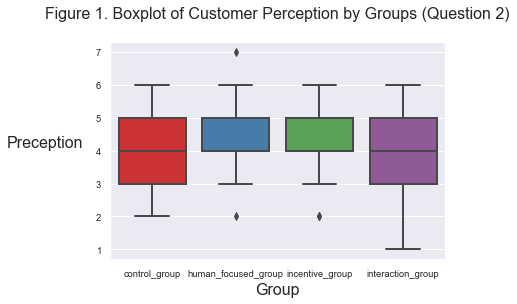

In [7]:
sns.set(font_scale=0.85)
ax = sns.boxplot(x = "Group", y = "Q2", data = data, palette="Set1", linewidth = 2)
ax.set_title("Figure 1. Boxplot of Customer Perception by Groups (Question 2)\n", fontsize=16)
ax.set_ylabel("Preception", rotation = 0, fontsize=16, labelpad=50)
ax.set_xlabel("Group", rotation = 0, fontsize=16)
plt.show()

Please refer to "[this link](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)" for explanation of the boxplot. 

After cleaning our data for analysis, we implemented a boxplot in Figure 1 where we see the following:
- All groups hover around the 4 to 5 rating
- Both human-focused group and incentive-group has less variance
- Interaction-group shows unhappy customers with rating of 1

Let's investigate through our statistical analysis below.

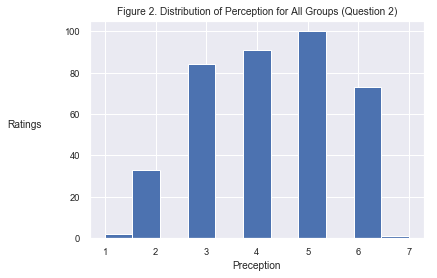

In [8]:
# Check for variable normality in perception dependent variable. 
plt.hist(data['Q2'], bins='auto')
plt.title("Figure 2. Distribution of Perception for All Groups (Question 2)")
plt.xlabel("Preception")
plt.ylabel("Ratings", rotation = 0, labelpad = 40)
plt.show()

In Figure 2, we see a normal distribution of ratings from Question 2 for all groups.

In [9]:
model = ols("Q2 ~ Group", data).fit(cov_type='HC3') # Allow Heteroscedasticity (fewer assumptions)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q2   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     4.035
Date:                Fri, 14 Jun 2019   Prob (F-statistic):            0.00762
Time:                        18:52:40   Log-Likelihood:                -628.27
No. Observations:                 384   AIC:                             1265.
Df Residuals:                     380   BIC:                             1280.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        4.0297      0.137     29.319      0.000       3.760       4.299
Group[T.human_focused_group]     0.4455      0.176      2.530      0.011       0.100       0.791
Group[T.incentive_group]         0.4059      0.177      2.299      0.021       0.060       0.752
Group[T.interaction_group]      -0.0544      0.209     -0.260      0.795      -0.465       0.356
==============================================================================
Omnibus:                       81.884   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.917
Skew:                          -0.066   Prob(JB):                     0.000212
Kurtosis:                       1.980   Cond. No.                         4.70
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

**Approach:**

We used OLS to test our hypothesis on the significance of each groups as an impact to customer perception for question 2 of the survey. Also, we tested each group against the control-group <u>individually</u> for more accuracy. Lastly, we used Heteroscedasticity to reduce all other assumptions for an even more robust model.

**Below is our three hypotheses:**

    H0: Control-Group = Human-Focused Group    H0: Control-Group = Incentive-Group    H0: Control-Group = Interaction-Group
    H1: Not H0                                 H1: Not H0                             H1: Not H0
    
<u>Note</u>: T-Critical value is ±1.96 (384 sample size, 3 degree of freedom)

**From our results in the table above, we see the following:**
- Control-Group
    - A base rating of **4.0297** (as shown in the coefficient)
- Human-Focused Group
    - Reject null hypothesis (T-stats of 2.53 > T-critical of ±1.96)
    - Significant impact to customer perception by increasing the rating from 4.0297 to **4.4752** (coefficient of 0.4455 is the amount of rating that was increased)
- Incentive-Group
    - Reject null hypothesis (T-stats of 2.299 > T-critical of ±1.96)
    - Significant impact to customer perception by increasing the rating from 4.0297 to **4.4356** (coefficient of 0.4059 is the amount of rating that was increased)
- Interaction-Group
    - Fail to reject null hypothesis (T-stats of -0.260 > T-critical of ±1.96)
    - Not a significant impact to customer perception by decreasing the rating from 4.0297 to **3.9753** (coefficient of -0.0544 is the amount of rating that was decreased)
    
**Overall Analysis:**

Based on Question 2 of the survey, we see that both Human-Focused Group and Incentive-Group increased the rating of customer perception, while Interaction-Group decreased the rating of customer perception. Although Human-Focused Group has a slightly higher increase in rating in comparison to the increase in rating from Incentive-Group, however, the difference is very minimal.

The decrease in rating for the Interaction-Group also supports our analysis from Figure 1 where we have unhappy customers with rating of 1.

**Recommendation:**

As a result, based on Question 2 of the survey, we recommend using **Incentive-Group** since it delivers similar results (slightly lower) as Human-Focused Group, but the Incentive-Group approach is much more cost efficient.

**Customer Behaviours**:

We also see that customers has a more favourable perception of the company when there is a possibility of winning a free lifetime socks contest. This explains that the possibilities of winning the contest can influence the company's perception to the customers.

## 4.2 Customer Perception: Question 3 (OLS)

In [10]:
# Make a copy of the cleaned data
data = df.copy()

# Filters the data to Question 3 and New Group columns only
data = data.filter(items=["Q3", "New Group"])

# Remove the first row
data = data.drop(range(0,1))
data = data.reset_index(drop=True) 

# Rename the Question 3 and New Group columns
data = data.rename({"Q3":"Q3","New Group":"Group"}, axis="columns")

# Change the data type
data['Q3'] = pd.to_numeric(data['Q3'])        # Numerical
data['Group'] = pd.Categorical(data['Group']) # Categorical

data.head(5)

,Q3,Group
0,5,control_group
1,5,control_group
2,4,human_focused_group
3,2,interaction_group
4,4,incentive_group


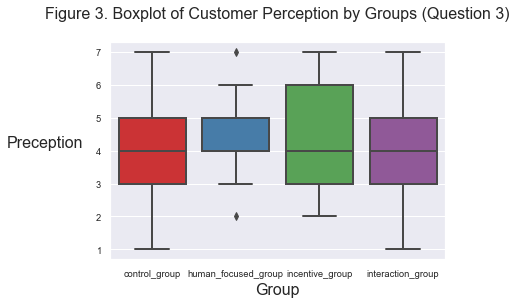

In [11]:
sns.set(font_scale=0.85)
ax = sns.boxplot(x = "Group", y = "Q3", data = data, palette="Set1", linewidth = 2)
ax.set_title("Figure 3. Boxplot of Customer Perception by Groups (Question 3)\n", fontsize=16)
ax.set_ylabel("Preception", rotation = 0, fontsize=16, labelpad=50)
ax.set_xlabel("Group", rotation = 0, fontsize=16)
plt.show()

Please refer to "[this link](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)" for explanation of the boxplot. 

After cleaning our data for analysis, we implemented a boxplot in Figure 3 where we see the following:
- All groups hover around the 4 to 5 rating once again
- Human-focused group has least variance
- Incentive group has the highest variance, but still shows a better range of ratings (between 3 and 6)
- Both control-group and interaction-group shows unhappy customers with ratings of 1

Let's investigate through our statistical analysis below.

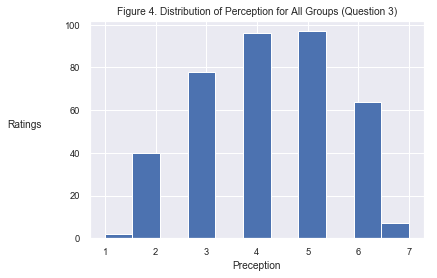

In [12]:
# Check for variable normality in perception dependent variable. 
plt.hist(data['Q3'], bins='auto') 
plt.title("Figure 4. Distribution of Perception for All Groups (Question 3)")
plt.xlabel("Preception")
plt.ylabel("Ratings", rotation = 0, labelpad = 40)
plt.show()

In Figure 4, we see a normal distribution of ratings from Question 3 for all groups.

In [13]:
model = ols("Q3 ~ Group", data).fit(cov_type='HC3') # Allow Heteroscedasticity (fewer assumptions)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q3   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     6.564
Date:                Fri, 14 Jun 2019   Prob (F-statistic):           0.000246
Time:                        18:52:41   Log-Likelihood:                -637.63
No. Observations:                 384   AIC:                             1283.
Df Residuals:                     380   BIC:                             1299.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.8812      0.144     27.004      0.000       3.599       4.163
Group[T.human_focused_group]     0.6436      0.175      3.680      0.000       0.301       0.986
Group[T.incentive_group]         0.5644      0.189      2.985      0.003       0.194       0.935
Group[T.interaction_group]       0.0694      0.216      0.322      0.748      -0.354       0.492
==============================================================================
Omnibus:                       40.734   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.545
Skew:                           0.079   Prob(JB):                      0.00189
Kurtosis:                       2.129   Cond. No.                         4.70
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

**Approach:**

We used OLS again to test our hypothesis on the significance of each groups as an impact to customer perception for question 3 of the survey. Also, we tested each group against the control-group <u>individually</u> for more accuracy. Lastly, we used Heteroscedasticity to reduce all other assumptions for an even more robust model.

**Below is our three hypothesis:**

    H0: Control-Group = Human-Focused Group    H0: Control-Group = Incentive-Group    H0: Control-Group = Interaction-Group
    H1: Not H0                                 H1: Not H0                             H1: Not H0
    
<u>Note</u>: T-Critical value is ±1.96 (384 sample size, 3 degree of freedom)

**From our results in the table above, we see the following:**
- Control-Group
    - A base rating of **3.8812** (as shown in the coefficient)
- Human-Focused Group
    - Reject null hypothesis (T-stats of 3.680 > T-critical of ±1.96)
    - Significant impact to customer perception by increasing the rating from 3.8812 to **4.5248** (coefficient of 0.6436 is the amount of rating that was increased)
- Incentive-Group
    - Reject null hypothesis (T-stats of 2.985 > T-critical of ±1.96)
    - Significant impact to customer perception by increasing the rating from 3.8812 to **4.4456** (coefficient of 0.5644 is the amount of rating that was increased)
- Interaction-Group
    - Fail to reject null hypothesis (T-stats of 0.322 < T-critical of ±1.96)
    - Not a significant impact to customer perception by increasing the rating from 3.8812 to **3.9506** (coefficient of 0.0694 is the amount of rating that was increased)
    
**Overall Analysis:**

Based on Question 3 of the survey, we see that both Human-Focused Group and Incentive-Group increased the rating of customer perception, while Interaction-Group had minimal impact for increasing the rating of customer perception. Although Human-Focused Group has a slightly higher increase in rating in comparison to the increase in rating from Incentive-Group, however, the difference is very minimal.

**Recommendation:**

As a result, based on Question 3 of the survey, we recommend using **Incentive-Group** again since it delivers similar results (slightly lower) as Human-Focused Group, but the Incentive-Group approach is much more cost efficient.

**Customer Behaviours**:

Once again, we see that customers has a more favourable perception of the company when there is a possibility of winning a free lifetime socks contest. This explains that the possibilities of winning the contest can influence the company's perception to the customers.

## 4.3 Customer Perception Overall Recommendations

Based on Question 2 and 3 of the survey, we can see that both Human-Focused Group and Incentive-Group increased the rating of customer perception from the original Control-Group. Although Human-Focused Group increased the ratings by slightly higher than the Incentive-Group, however, since the Incentive-Group is significantly more cost efficient than Human-Focused Group, then the significant increase in cost savings from the Incentive-Group <u>outweighs</u> the marginal increase in ratings from the Human-Focused Group. Therefore, **we recommend using Incentive-Group approach** for increasing customer perception while saving costs.

Also, by using the **Incentive-Group approach**, customers will have a better perception of the company, since the possibilities of winning the contest can influence the customer's behaviours.

<u>Note</u>: We will not consider the Interaction-Group since it was not significant for increasing the customer perception as evident in our analyses

# 5 Hypothesis Testing For Customer Comprehension

In order to understand which group provides the best approach for improving Customer Comprehension of the company, we will use Question 4 and Question 5 of the Survey.

## 5.1 Customer Comprehension: Question 4 (LOG)

In [14]:
# Make a copy of the cleaned data
data = df.copy()

# Add a new column that filters Question 4 into a dummy variable column (Comprehension Column)
def add_dummy(variable):
    if (variable == "Organic"):
        return 1
    if (variable == "Hydroponics") or (variable == "Moonlight Harvest") or\
    (variable == "Conventional Farming"):
        return 0  
data['Comprehension'] = data['Q4'].apply(add_dummy)  

# Filters the data to Comprehension and New Group columns only
data = data.filter(items=["Comprehension", "New Group"])

# Remove the first row
data = data.drop(range(0,1))
data = data.reset_index(drop=True)

# Rename the Comprehension and New Group columns
data = data.rename({"Comprehension":"Comprehension","New Group":"Group"}, axis="columns")

# Change the data type
data['Comprehension'] = pd.to_numeric(data['Comprehension'])  # Numerical
data['Group'] = pd.Categorical(data['Group'])                 # Categorical

data.head(5)

,Comprehension,Group
0,0.0,control_group
1,0.0,control_group
2,1.0,human_focused_group
3,0.0,interaction_group
4,0.0,incentive_group


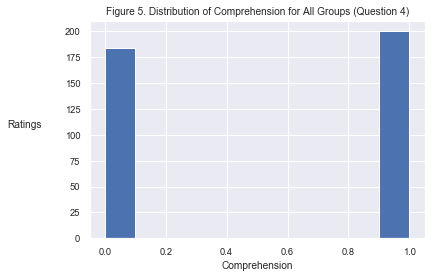

In [15]:
# Check for variable normality in comprehension dependent variable. 
plt.hist(data['Comprehension'], bins='auto') 
plt.title("Figure 5. Distribution of Comprehension for All Groups (Question 4)")
plt.xlabel("Comprehension")
plt.ylabel("Ratings", rotation = 0, labelpad = 40)
plt.show()

In Figure 5, we see a pretty even distribution of ratings from Question 4 for all groups.

In [16]:
y, X = dmatrices("Comprehension ~ Group", data, return_type = 'dataframe')
model = Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.688881
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Comprehension   No. Observations:                  384
Model:                          Logit   Df Residuals:                      380
Method:                           MLE   Df Model:                            3
Date:                Fri, 14 Jun 2019   Pseudo R-squ.:                0.004908
Time:                        18:52:41   Log-Likelihood:                -264.53
converged:                       True   LL-Null:                       -265.84
                                        LLR p-value:                    0.4558
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.0594      0.199     -0.298      0.765      -0.450       0.331
Group[T.human_focused_group]     0.2781      0.282      0.985      0.325      -0.275       0.831
Group[T.incentive_group]         0.3183      0.283      1.126      0.260      -0.236       0.872
Group[T.interaction_group]      -0.0642      0.299     -0.215      0.830      -0.650       0.521
================================================================================================
"""

**Approach:**

We used Logistic Regression to test our hypothesis on the significance of each groups as an impact to customer comprehension for question 4 of the survey. Also, we tested each group against the control-group <u>individually</u> for more accuracy.


**Below is our three hypothesis:**

    H0: Control-Group = Human-Focused Group    H0: Control-Group = Incentive-Group    H0: Control-Group = Interaction-Group
    H1: Not H0                                 H1: Not H0                             H1: Not H0
    
<u>Note</u>: T-Critical value is ±1.96 (384 sample size, 3 degree of freedom)

**From our results in the table above, we see the following:**
- Control-Group
    - A base result of **-0.0594** (as shown in the coefficient)
    
**<u>Note</u>**: Since we are using Logistic Regression, then it is possible to have negative coefficients, since the coefficients are derived from the `Log` of "Odds Ratio" (Odds Ratio is the probability of an event over total occurrences)
<br>
ie. There is 100 reviews, and 50 of the reviews are positive and the other 50 are negative. Odd ratio for positive will be 50/100 = 0.50 and the `Log(50) = -0.30`

- Human-Focused Group
    - Fail to reject null hypothesis (T-stats of 0.985 < T-critical of ±1.96)
    - Not a significant impact to customer comprehension by increasing the results from -0.0594 to **0.2187** (coefficient 0.2781 is the amount of rating that was increased)
- Incentive-Group
    - Fail to reject null hypothesis (T-stats of 1.126 < T-critical of ±1.96)
    - Not a significant impact to customer comprehension by increasing the results from -0.0594 to **0.2589** (coefficient 0.3183 is the amount of rating that was increased)
- Interaction-Group
    - Fail to reject null hypothesis (T-stats of -0.215 > T-critical of ±1.96)
    - Not a significant impact to customer comprehension by decreasing the results from -0.0594 to **-0.1236** (coefficient -0.0642 is the amount of rating that was decreased)
    
**Overall Analysis:**

Based on Question 4 of the survey, we see that Human-Focused Group, Incentive-Group, and Interaction-Group did not make any significant impact on improving the customer comprehension of the company.

**Recommendation:**

As a result, based on Question 4 of the survey, we recommend using the **Control-Group**. 

**Customer Behaviours**:

We see that any customer incentives or quality customer services does not improve the customer's behaviour to learn more about the products, since customers are more focused on satisfying their immediate desire to get the product they want, rather than educating themselves about the company.

## 5.2 Customer Comprehension: Question 5 (LOG)

In [17]:
# Make a copy of the cleaned data
data = df.copy()

# Add a new column that filters Question 5 into a dummy variable column (Comprehension Column)
def add_dummy(variable):
    if (variable == "Socks that change colour so you never wear mismatched socks again"):
        return 1
    if (variable == "Anti-sweat technology") or (variable == "Socks that never get holes") or\
    (variable == "Sock bands that always stay up") or (variable == "Unsure"):
        return 0  
data['Comprehension'] = data['Q5'].apply(add_dummy)  

# Filters the data to Comprehension and New Group columns only
data = data.filter(items=["Comprehension", "New Group"])

# Remove the first row
data = data.drop(range(0,1))
data = data.reset_index(drop=True)

# Rename the Comprehension and New Group columns
data = data.rename({"Comprehension":"Comprehension","New Group":"Group"}, axis="columns")

#Change the data type
data['Comprehension'] = pd.to_numeric(data['Comprehension'])  # Numerical
data['Group'] = pd.Categorical(data['Group'])                 # Categorical

data.head(5)

,Comprehension,Group
0,0.0,control_group
1,0.0,control_group
2,0.0,human_focused_group
3,0.0,interaction_group
4,0.0,incentive_group


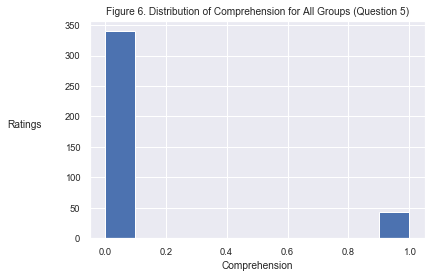

In [18]:
# Check for variable normality in comprehension dependent variable. 
plt.hist(data['Comprehension'], bins='auto')
plt.title("Figure 6. Distribution of Comprehension for All Groups (Question 5)")
plt.xlabel("Comprehension")
plt.ylabel("Ratings", rotation = 0, labelpad = 40)
plt.show()

In Figure 6, we see an unbalanced distribution of ratings from Question 5 for all groups, however, this is not a concern since we are not using the data for prediction.

In [19]:
y, X = dmatrices("Comprehension ~ Group", data, return_type = 'dataframe')
model = Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.355292
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Comprehension   No. Observations:                  384
Model:                          Logit   Df Residuals:                      380
Method:                           MLE   Df Model:                            3
Date:                Fri, 14 Jun 2019   Pseudo R-squ.:                0.001967
Time:                        18:52:42   Log-Likelihood:                -136.43
converged:                       True   LL-Null:                       -136.70
                                        LLR p-value:                    0.9105
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.9124      0.297     -6.436      0.000      -2.495      -1.330
Group[T.human_focused_group]    -0.1895      0.436     -0.434      0.664      -1.045       0.665
Group[T.incentive_group]        -0.2959      0.446     -0.663      0.507      -1.171       0.579
Group[T.interaction_group]      -0.0477      0.450     -0.106      0.916      -0.929       0.834
================================================================================================
"""

**Approach:**

We used Logistic Regression again to test our hypothesis on the significance of each groups as an impact to customer comprehension for question 5 of the survey. Also, we tested each group against the control-group <u>individually</u> for more accuracy.


**Below is our three hypothesis:**

    H0: Control-Group = Human-Focused Group    H0: Control-Group = Incentive-Group    H0: Control-Group = Interaction-Group
    H1: Not H0                                 H1: Not H0                             H1: Not H0
    
<u>Note</u>: T-Critical value is ±1.96 (384 sample size, 3 degree of freedom)

**From our results in the table above, we see the following:**
- Control-Group
    - A base result of **-1.9124** (as shown in the coefficient)
    
**<u>Note</u>**: Since we are using Logistic Regression, then it is possible to have negative coefficients, since the coefficients are derived from the `Log` of "Odds Ratio" (Odds Ratio is the probability of an event over total occurrences)
<br>
ie. There is 100 reviews, and 50 of the reviews are positive and the other 50 are negative. Odd ratio for positive will be 50/100 = 0.50 and the `Log(50) = -0.30`

- Human-Focused Group
    - Fail to reject null hypothesis (T-stats of -0.434 > T-critical of ±1.96)
    - Not a significant impact to customer comprehension by decreasing the results from -1.9124 to **-2.1019** (coefficient -0.1895 is the amount of rating that was decreased)
- Incentive-Group
    - Fail to reject null hypothesis (T-stats of -0.663 > T-critical of ±1.96)
    - Not a significant impact to customer comprehension by decreasing the results from -1.9124 to **-2.2083** (coefficient -0.2959 is the amount of rating that was decreased)
- Interaction-Group
    - Fail to reject null hypothesis (T-stats of -0.106 > T-critical of ±1.96)
    - Not a significant impact to customer comprehension by decreasing the results from -1.9124 to **-1.9601** (coefficient -0.0477 is the amount of rating that was decreased)
    
**Overall Analysis:**

Based on Question 5 of the survey, we see that Human-Focused Group, Incentive-Group, and Interaction-Group did not make any significant impact on improving the customer comprehension of the company.

**Recommendation:**

As a result, based on Question 5 of the survey, we recommend using the **Control-Group** again. 

**Customer Behaviours:**

We see that any customer incentives or quality customer services does not improve the customer's behaviour to learn more about the products, since customers are more focused on satisfying their immediate desire to get the product they want, rather than educating themselves about the company.

## 5.3 Customer Comprehension Overall Recommendations

Based on Question 4 and 5 of the survey, we can see that the company is better off staying with the Control-Group. Therefore, **we recommend using Control-Group approach** for working with customer comprehension.

Also, by using the **Control-Group approach**, will still have the same comprehension level of the company from the customers, since the customers are more focused on satisfying their own needs.

# 6 Hypothesis Testing For Customer Recommendations

In order to understand which group provides the best approach for improving Customer Recommendations of the company, we will use Question 6 and Question 7 of the Survey.

## 6.1 Customer Recommendations: Question 6 (OLS)

In [20]:
# Make a copy of the cleaned data
data = df.copy()

# Filters the data to Question 6 and New Group columns only
data = data.filter(items=["Q6", "New Group"])

# Remove the first row
data = data.drop(range(0,1))
data = data.reset_index(drop=True) 

# Rename the Question 6 and Group columns
data = data.rename({"Q6":"Q6","New Group":"Group"}, axis="columns")

# Change the data type
data['Q6'] = pd.to_numeric(data['Q6'])        # Numerical
data['Group'] = pd.Categorical(data['Group']) # Categorical

data.head(5)

,Q6,Group
0,5,control_group
1,5,control_group
2,4,human_focused_group
3,2,interaction_group
4,3,incentive_group


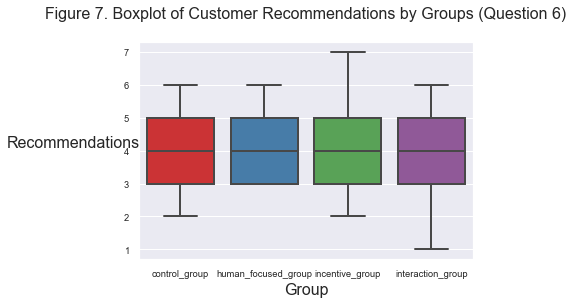

In [21]:
sns.set(font_scale=0.85)
ax = sns.boxplot(x = "Group", y = "Q6", data = data, palette="Set1", linewidth = 2)
ax.set_title("Figure 7. Boxplot of Customer Recommendations by Groups (Question 6)\n", fontsize=16)
ax.set_ylabel("Recommendations", rotation = 0, fontsize=16, labelpad=50)
ax.set_xlabel("Group", rotation = 0, fontsize=16)
plt.show()

Please refer to "[this link](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)" for explanation of the boxplot. 

After cleaning our data for analysis, we implemented a boxplot in Figure 7 where we see the following:
- All groups hover around the 4 to 5 rating once again
- All groups has the same variance level
- Incentive-Group shows happier customers with ratings of 7
- Interaction-group shows unhappy customers with ratings of 1

Let's investigate through our statistical analysis below.

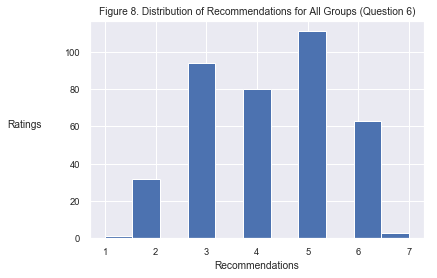

In [22]:
# Check for variable normality in recommendations dependent variable. 
plt.hist(data['Q6'], bins='auto')
plt.title("Figure 8. Distribution of Recommendations for All Groups (Question 6)")
plt.xlabel("Recommendations")
plt.ylabel("Ratings", rotation = 0, labelpad = 40)
plt.show()

In Figure 8, we see a normal distribution of ratings from Question 6 for all groups.

In [23]:
model = ols("Q6 ~ Group", data).fit(cov_type='HC3') # Allow Heteroscedasticity (fewer assumptions)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Q6   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     4.696
Date:                Fri, 14 Jun 2019   Prob (F-statistic):            0.00312
Time:                        18:52:42   Log-Likelihood:                -624.07
No. Observations:                 384   AIC:                             1256.
Df Residuals:                     380   BIC:                             1272.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        4.0594      0.133     30.630      0.000       3.800       4.319
Group[T.human_focused_group]     0.3564      0.173      2.064      0.039       0.018       0.695
Group[T.incentive_group]         0.4059      0.180      2.260      0.024       0.054       0.758
Group[T.interaction_group]      -0.1829      0.197     -0.930      0.352      -0.568       0.202
==============================================================================
Omnibus:                      154.522   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.954
Skew:                          -0.053   Prob(JB):                     2.82e-05
Kurtosis:                       1.861   Cond. No.                         4.70
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

**Approach:**

We used OLS again to test our hypothesis on the significance of each groups as an impact to customer recommendations for question 6 of the survey. Also, we tested each group against the control-group <u>individually</u> for more accuracy. Lastly, we used Heteroscedasticity to reduce all other assumptions for an even more robust model.

**Below is our three hypothesis:**

    H0: Control-Group = Human-Focused Group    H0: Control-Group = Incentive-Group    H0: Control-Group = Interaction-Group
    H1: Not H0                                 H1: Not H0                             H1: Not H0
    
<u>Note</u>: T-Critical value is ±1.96 (384 sample size, 3 degree of freedom)

**From our results in the table above, we see the following:**
- Control-Group
    - A base rating of **4.0594** (as shown in the coefficient)
- Human-Focused Group
    - Reject null hypothesis (T-stats of 2.064 > T-critical of ±1.96)
    - Significant impact to customer recommendations by increasing the rating from 4.0594 to **4.4158** (coefficient of 0.3564 is the amount of rating that was increased)
- Incentive-Group
    - Reject null hypothesis (T-stats of 2.260 > T-critical of ±1.96)
    - Significant impact to customer recommendations by increasing the rating from 4.0594 to **4.4653** (coefficient of 0.4059 is the amount of rating that was increased)
- Interaction-Group
    - Fail to reject null hypothesis (T-stats of -0.930 > T-critical of ±1.96)
    - Not a significant impact to customer recommendations by decreasing the rating from 4.0594 to **3.8765** (coefficient of -0.1829 is the amount of rating that was decreased)
    
**Overall Analysis:**

Based on Question 6 of the survey, we see that both Human-Focused Group and Incentive-Group increased the rating of customer recommendations, while Interaction-Group had minimal impact for increasing the rating of customer recommendations. Also, Incentive-Group has a higher increase in ratings in comparison to the increase in ratings from Human-Focused Group.

**Recommendation:**

As a result, based on Question 6 of the survey, we recommend using **Incentive-Group** again since it delivers better results than Human-Focused Group, while being more cost efficient.

**Customer Behaviours**:

Once again, we see that customers has a more favourable recommendations of the company when there is a possibility of winning a free lifetime socks contest. This explains that the possibilities of winning the contest can influence the company's recommendations by the customer.

## 6.2 Customer Recommendations: Question 7 (LOG)

In [24]:
# Make a copy of the cleaned data
data = df.copy()

# Add a new column that filters Question 7 into a dummy variable column (Recommendations Column)
def add_dummy(variable):
    if (variable == "Yes"):
        return 1
    if (variable == "No"):
        return 0  
data['Recommendations'] = data['Q7'].apply(add_dummy)  

# Filters the data to Recommendations and New Group columns only
data = data.filter(items=["Recommendations", "New Group"])

# Remove the first row
data = data.drop(range(0,1))
data = data.reset_index(drop=True)

# Rename the Recommendations and Group columns
data = data.rename({"Recommendations":"Recommendations","New Group":"Group"}, axis="columns")

#Change the data type
data['Recommendations'] = pd.to_numeric(data['Recommendations'])  # Numerical
data['Group'] = pd.Categorical(data['Group'])                     # Categorical

data.head(5)

,Recommendations,Group
0,1.0,control_group
1,0.0,control_group
2,0.0,human_focused_group
3,1.0,interaction_group
4,0.0,incentive_group


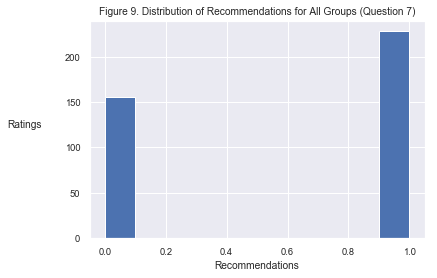

In [25]:
# Check for variable normality in recommendations dependent variable. 
plt.hist(data['Recommendations'], bins='auto')
plt.title("Figure 9. Distribution of Recommendations for All Groups (Question 7)")
plt.xlabel("Recommendations")
plt.ylabel("Ratings", rotation = 0, labelpad = 40)
plt.show()

In Figure 9, we see a pretty even distribution of ratings from Question 7 for all groups.

In [26]:
y, X = dmatrices("Recommendations ~ Group", data, return_type = 'dataframe')
model = Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.651674
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Recommendations   No. Observations:                  384
Model:                          Logit   Df Residuals:                      380
Method:                           MLE   Df Model:                            3
Date:                Fri, 14 Jun 2019   Pseudo R-squ.:                 0.03522
Time:                        18:52:43   Log-Likelihood:                -250.24
converged:                       True   LL-Null:                       -259.38
                                        LLR p-value:                 0.0003866
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.2589      0.201     -1.290      0.197      -0.652       0.134
Group[T.human_focused_group]     0.8068      0.288      2.802      0.005       0.242       1.371
Group[T.incentive_group]         1.2171      0.299      4.064      0.000       0.630       1.804
Group[T.interaction_group]       0.5826      0.302      1.932      0.053      -0.008       1.174
================================================================================================
"""

**Approach:**

We used Logistic Regression again to test our hypothesis on the significance of each groups as an impact to customer comprehension for question 7 of the survey. Also, we tested each group against the control-group <u>individually</u> for more accuracy.


**Below is our three hypothesis:**

    H0: Control-Group = Human-Focused Group    H0: Control-Group = Incentive-Group    H0: Control-Group = Interaction-Group
    H1: Not H0                                 H1: Not H0                             H1: Not H0
    
<u>Note</u>: T-Critical value is ±1.96 (384 sample size, 3 degree of freedom)

**From our results in the table above, we see the following:**
- Control-Group
    - A base result of **-0.2589** (as shown in the coefficient)
    
**<u>Note</u>**: Since we are using Logistic Regression, then it is possible to have negative coefficients, since the coefficients are derived from the `Log` of "Odds Ratio" (Odds Ratio is the probability of an event over total occurrences)
<br>
ie. There is 100 reviews, and 50 of the reviews are positive and the other 50 are negative. Odd ratio for positive will be 50/100 = 0.50 and the `Log(50) = -0.30`

- Human-Focused Group
    - Reject null hypothesis (T-stats of 2.802 > T-critical of ±1.96)
    - Significant impact to customer recommendations by increasing the results from -0.2589 to **0.5479** (coefficient of 0.8068 is the amount of rating that was increased)
- Incentive-Group
    - Reject null hypothesis (T-stats of 4.064 > T-critical of ±1.96)
    - Significant impact to customer recommendations by increasing the results from -0.2589 to **0.9582** (coefficient of 1.2171 is the amount of rating that was increased)
- Interaction-Group
    - Fail to reject null hypothesis (T-stats of 1.932 < T-critical of ±1.96)
    - Not a significant impact to customer recommendations by increasing the results from -0.2589 to **0.3237** (coefficient of 0.5826 is the amount of rating that was increased)
    
**Overall Analysis:**

Based on Question 7 of the survey, we see that both Human-Focused Group and Incentive-Group increased the rating of customer recommendations, while Interaction-Group had minimal impact for increasing the rating of customer recommendations. Also, Incentive-Group has a higher increase in ratings in comparison to the increase in ratings from Human-Focused Group.

**Recommendation:**

As a result, based on Question 7 of the survey, we recommend using **Incentive-Group** again since it delivers better results than Human-Focused Group, while being more cost efficient.

**Customer Behaviours**:

Once again, we see that customers has a more favourable recommendations of the company when there is a possibility of winning a free lifetime socks contest. This explains that the possibilities of winning the contest can influence the company's recommendations by the customer.

## 6.3 Customer Recommendations Overall Recommendations

Based on Question 6 and 7 of the survey, we can see that both Human-Focused Group and Incentive-Group increased the rating of customer recommendations from the original Control-Group. Also, the Incentive-Group significantly <u>outweighs</u> the impact of customer recommendations in comparison to the Human-Focused Group. Therefore, **we recommend using Incentive-Group approach** for increasing customer recommendations.

Also, by using the **Incentive-Group approach**, customers will further recommend the company, since the possibilities of winning the contest can influence the customer's behaviours.

<u>Note</u>: We will not consider the Interaction-Group since it was not significant for increasing the customer recommendations as evident in our analyses

# 7 Final Recommendations and Customer Behaviours

Based on the complete statistical analysis, we recommend ABC Socks Company to implement the **Incentive-Based Approach** to increase the <u>overall</u> perception of the company's brand.

More specifically, we also conclude the following:
- Human-Focused Approach has the most impact on customer's <u>perception</u> of the company

(**Note**: Although our statistical analysis showed that Human-Focused Approach had the best impact, however we recommend using **Incentive-Based Approach** for better cost savings and slightly lower positive impact)
- Neither approaches has any impact on customer's <u>comprehension</u> of the company

(**Note**: Since neither approach had any positive impact, we recommend remaining with the control approach with zero cost for the company)
- Incentive-Based Approach has the most impact on customer's <u>recommendations</u> of the company

**Behavioural Analysis:**

Upon our recommendations to implement **Incentive-Based Approach**, and based on a sample size of 384 survey, this implies that there is only 0.26% chance of winning (excluding any additional surveys) since only one customer will win the contest. 

Also, given that Incentive-Based Approach has a strong <u>overall</u> impact on the company's brand in comparison to all other approaches, then this entails that customers prefer to satisfy their immediate desire on the possibility of winning the contest, in exchange for giving a positive impact on the company's perception, without considering the odds of winning the contest.

Therefore, we conclude that the option on the possibility of a customer winning the contest, will positively influence the company's overall brand. This is also in the company's best interest to increase the brand's perception <u>with</u> minimum amount of added cost.